In [1]:
# from myreport import html_report
from IPython.display import HTML
tog='''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''';
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import copy
import math
def init_esplot():
    plt.close('all');
    fig=plt.figure(figsize=[10, 4]);
    ax=plt.subplot(1,1,1)
    return(ax,fig)
HTML(tog)


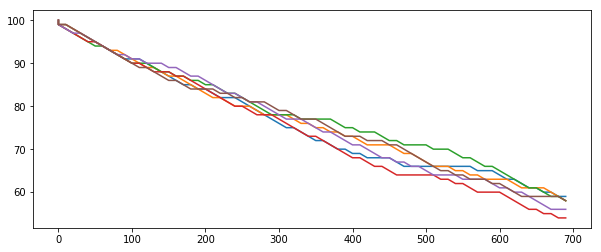

In [2]:
### STOCHASTIC march forward
def march(yiter,ytnow,dt,params):
    ynow,tnow=ytnow;
    yout=yiter(ynow,tnow,params);
    tout=tnow+dt;
    return (yout,tout);


class state():
    def __init__(self,yiter,yt,dt):
        self.yiter=yiter
        self.dt=dt;
        self.yt=np.array(yt);
#         self.t=0;
        self.ys=[yt[0]];
        self.ts=[yt[1]];
#         self.ts=np.array();
    def get_params(self):
        pass
    def forward(self,dur):
        ts=np.arange(self.yt[1],self.yt[1]+dur,self.dt);
        for t in ts:
            self.yt=march(self.yiter,
                          self.yt,
                          self.dt,
                          self.get_params());
#             print(self.ys)
            self.ys=np.vstack((np.array(self.ys) ,
                                np.array(self.yt[0]) ))
        self.ts =self.ts + list(ts);
                    
        
    
def yiter(ynow,t,params):
    fmrna, nfmrna = ynow;
    react= int(random.random() < fmrna/(fmrna+nfmrna));
#     print fmrna/(fmrna+nfmrna);
    fmrna +=-react;
    nfmrna+=react;
    
    
    return  (fmrna,nfmrna)

# mrna=state(yiter,[(200.,10.),0.],1.);
# mrna.forward(1000);

mrna=state(yiter,[(100.,20.),0.],10.);
mrna.forward(300);

plt.close('all');
fig=plt.figure(figsize=[10, 4]);
ax=plt.subplot(1,1,1)

# ax.plot(mrna.ts,mrna.ys[:,0]);
# ax.plot(mrna.ts,mrna.ys[:,1]);

runs=[];
s0=state(yiter,[(100.,20.),0.],10.);
for i in range(6):
    s=copy.copy(s0);
    s.forward(700)
    runs.append(s.ys[:,0]);
#     ax.plot(s.ts,s.ys[:,0]);
#     ax.plot(s.ts,s.ys[:,1]);
ax.plot(s.ts,np.array(runs).T);




In [4]:
execfile('gene_exp1.py')

SyntaxError: invalid syntax (gene_exp1.py, line 33)